## Reuters dataset
Single-label, multiclass classification problem

In [1]:
from keras.datasets import reuters
help(reuters)

Using TensorFlow backend.


Help on module keras.datasets.reuters in keras.datasets:

NAME
    keras.datasets.reuters - Reuters topic classification dataset.

FUNCTIONS
    get_word_index(path='reuters_word_index.json')
        Retrieves the dictionary mapping words to word indices.
        
        # Arguments
            path: where to cache the data (relative to `~/.keras/dataset`).
        
        # Returns
            The word index dictionary.
    
    load_data(path='reuters.npz', num_words=None, skip_top=0, maxlen=None, test_split=0.2, seed=113, start_char=1, oov_char=2, index_from=3, **kwargs)
        Loads the Reuters newswire classification dataset.
        
        # Arguments
            path: where to cache the data (relative to `~/.keras/dataset`).
            num_words: max number of words to include. Words are ranked
                by how often they occur (in the training set) and only
                the most frequent words are kept
            skip_top: skip the top N most frequently occurrin

In [14]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)
print(f'Train data size: {train_data.shape}')
print(f'Test data size: {test_data.shape}')

Train data size: (8982,)
Test data size: (2246,)
Number of labels: [ 3  4  3 ... 25  3 25]


### 2. Data preparation
I'm going to vectorize the X data - vector of 0s and 1s, coding which words were find in the sequence <br>
    For labels we'll use one-hot-encoding with a keras built in function

In [10]:
import numpy as np

def vectorize_sequence(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 3. Building model

In [41]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [42]:
x_val = x_train[:1000]
y_val = one_hot_train_labels[:1000]
partial_x_train = x_train[1000:]
partial_y_train = one_hot_train_labels[1000:]

In [43]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 72us/step - loss: 2.5862 - acc: 0.5495 - val_loss: 1.7361 - val_acc: 0.6250
Epoch 2/20
7982/7982 [==============================] - 0s 38us/step - loss: 1.4585 - acc: 0.6878 - val_loss: 1.3361 - val_acc: 0.7180
Epoch 3/20
7982/7982 [==============================] - 0s 40us/step - loss: 1.0994 - acc: 0.7590 - val_loss: 1.1578 - val_acc: 0.7470
Epoch 4/20
7982/7982 [==============================] - 0s 38us/step - loss: 0.8750 - acc: 0.8138 - val_loss: 1.0735 - val_acc: 0.7620
Epoch 5/20
7982/7982 [==============================] - 0s 40us/step - loss: 0.7000 - acc: 0.8572 - val_loss: 0.9771 - val_acc: 0.8070
Epoch 6/20
7982/7982 [==============================] - 0s 39us/step - loss: 0.5595 - acc: 0.8851 - val_loss: 0.9225 - val_acc: 0.8160
Epoch 7/20
7982/7982 [==============================] - 0s 39us/step - loss: 0.4561 - acc: 0.9043 - val_loss: 0.9121 - val_acc: 0.8180
Epoch 8

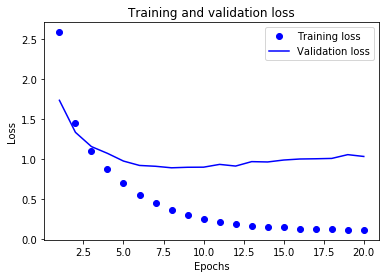

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

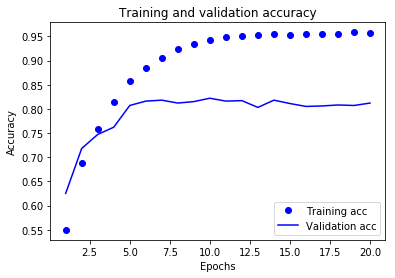

In [45]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### 4. Training the model
network overfits around 9th epoch, so we'll just retrain it until that point

In [47]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 512,
         validation_data = (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 90us/step - loss: 2.6615 - acc: 0.5361 - val_loss: 1.7309 - val_acc: 0.6440
Epoch 2/9
7982/7982 [==============================] - 0s 57us/step - loss: 1.3943 - acc: 0.7124 - val_loss: 1.2888 - val_acc: 0.7250
Epoch 3/9
7982/7982 [==============================] - 0s 56us/step - loss: 1.0392 - acc: 0.7694 - val_loss: 1.1418 - val_acc: 0.7510
Epoch 4/9
7982/7982 [==============================] - 0s 56us/step - loss: 0.8208 - acc: 0.8196 - val_loss: 1.0686 - val_acc: 0.7710
Epoch 5/9
7982/7982 [==============================] - 0s 57us/step - loss: 0.6581 - acc: 0.8631 - val_loss: 1.0025 - val_acc: 0.7860
Epoch 6/9
7982/7982 [==============================] - 0s 59us/step - loss: 0.5292 - acc: 0.8919 - val_loss: 0.9422 - val_acc: 0.8020
Epoch 7/9
7982/7982 [==============================] - 0s 56us/step - loss: 0.4264 - acc: 0.9137 - val_loss: 0.9321 - val_acc: 0.8070
Epoch 8/9
7982

In [58]:
model = models.Sequential()
model.add(layers.Dense(92, activation = 'relu', input_shape=(10000, )))
#model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train, one_hot_train_labels, epochs = 9, batch_size = 512,
         validation_data = (x_test, one_hot_test_labels))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 8982 samples, validate on 2246 samples
Epoch 1/9
8982/8982 [==============================] - 1s 115us/step - loss: 2.3371 - acc: 0.5863 - val_loss: 1.6148 - val_acc: 0.6950
Epoch 2/9
8982/8982 [==============================] - 1s 64us/step - loss: 1.2465 - acc: 0.7577 - val_loss: 1.2276 - val_acc: 0.7364
Epoch 3/9
8982/8982 [==============================] - 1s 65us/step - loss: 0.8835 - acc: 0.8244 - val_loss: 1.0690 - val_acc: 0.7676
Epoch 4/9
8982/8982 [==============================] - 1s 65us/step - loss: 0.6697 - acc: 0.8684 - val_loss: 0.9604 - val_acc: 0.7939
Epoch 5/9
8982/8982 [==============================] - 1s 64us/step - loss: 0.5168 - acc: 0.8982 - val_loss: 0.9075 - val_acc: 0.7979
Epoch 6/9
8982/8982 [==============================] - 1s 65us/step - loss: 0.4084 - acc: 0.9174 - val_loss: 0.8835 - val_acc: 0.8023
Epoch 7/9
8982/8982 [==============================] - 1s 63us/step - loss: 0.3320 - acc: 0.9303 - val_loss: 0.8663 - val_acc: 0.8023
Epoch 8/9
898

In [59]:
predictions = model.predict(x_test)
predictions[0].shape
np.sum(predictions[0])


0.9999999

In [60]:
np.argmax(predictions[0])

3

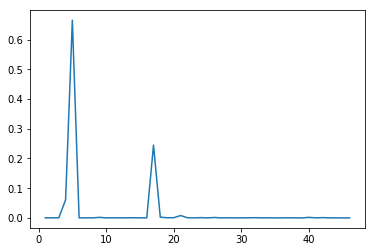

In [63]:
plt.plot(range(1,47), predictions[3])
plt.show()